<a href="https://colab.research.google.com/github/jamissonfreitas/IN1119/blob/master/analise_mes_ano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# População Brasileira

In [0]:
populacao_data = StringIO("""Ano;População
  2000;173448346
  2001;175885229
  2002;178276128
  2003;180619108
  2004;182911487
  2005;185150806
  2006;187335137
  2007;189462755
  2008;191532439
  2009;193543969
  2010;195497797
  2011;197397018
  2012;199242462
  2013;201032714
  2014;202768562
  2015;204450649
  2016;206081432
  2017;207660929
"""
)

In [3]:
df_populacao = pd.read_csv(populacao_data, index_col=0, sep=';')
df_populacao

,População
Ano,
2000,173448346
2001,175885229
2002,178276128
2003,180619108
2004,182911487
2005,185150806
2006,187335137
2007,189462755
2008,191532439


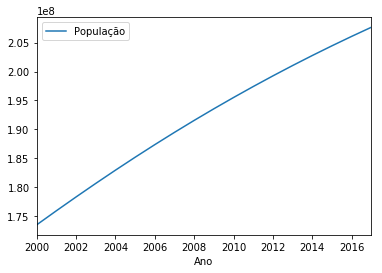

In [4]:
df_populacao.plot.line()

# Número de suicídios por mês

In [0]:
obitos_mes = StringIO("""
"Mes";"2000";"2001";"2002";"2003";"2004";"2005";"2006";"2007";"2008";"2009";"2010";"2011";"2012";"2013";"2014";"2015";"2016";"2017";"Total"
"Janeiro";610;684;650;683;714;751;791;786;817;825;845;817;877;918;928;1047;941;1059;14743
"Fevereiro";554;620;639;613;646;661;685;674;823;738;726;757;912;876;879;852;926;967;13548
"Março";585;691;676;699;698;705;803;791;824;812;801;845;839;934;956;947;929;1055;14590
"Abril";548;659;620;668;691;680;684;722;767;775;754;842;851;853;897;935;919;923;13788
"Maio";522;611;622;623;658;715;680;761;715;788;809;827;801;891;825;899;927;1029;13703
"Junho";520;641;563;610;629;637;627;713;714;714;702;755;767;826;802;867;879;932;12898
"Julho";525;620;603;594;575;685;748;689;757;743;745;805;840;797;753;851;925;938;13193
"Agosto";555;658;652;648;665;783;712;773;760;748;789;835;821;855;937;915;910;1071;14087
"Setembro";532;657;634;689;672;701;688;727;787;752;768;819;888;902;917;902;962;1135;14132
"Outubro";651;618;701;689;669;810;750;766;787;780;856;819;892;906;900;990;1047;1212;14843
"Novembro";555;610;660;673;684;704;703;693;749;839;794;800;878;838;915;921;1016;1063;14095
"Dezembro";621;669;706;672;716;718;768;773;828;860;859;931;955;937;944;1052;1052;1111;15172
"""
)

In [6]:
df_obitos = pd.read_csv(obitos_mes, index_col=0, sep=';')
del df_obitos['Total']
df_obitos

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Mes,,,,,,,,,,,,,,,,,,
Janeiro,610,684,650,683,714,751,791,786,817,825,845,817,877,918,928,1047,941,1059
Fevereiro,554,620,639,613,646,661,685,674,823,738,726,757,912,876,879,852,926,967
Março,585,691,676,699,698,705,803,791,824,812,801,845,839,934,956,947,929,1055
Abril,548,659,620,668,691,680,684,722,767,775,754,842,851,853,897,935,919,923
Maio,522,611,622,623,658,715,680,761,715,788,809,827,801,891,825,899,927,1029
Junho,520,641,563,610,629,637,627,713,714,714,702,755,767,826,802,867,879,932
Julho,525,620,603,594,575,685,748,689,757,743,745,805,840,797,753,851,925,938
Agosto,555,658,652,648,665,783,712,773,760,748,789,835,821,855,937,915,910,1071
Setembro,532,657,634,689,672,701,688,727,787,752,768,819,888,902,917,902,962,1135


Text(0, 0.5, 'Número de óbidos')

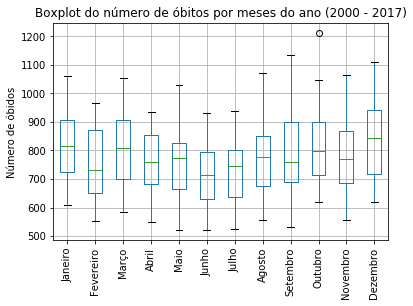

In [7]:
ax = df_obitos.T.boxplot(rot=90)
ax.set_title('Boxplot do número de óbitos por meses do ano (2000 - 2017)')
ax.set_ylabel('Número de óbidos')

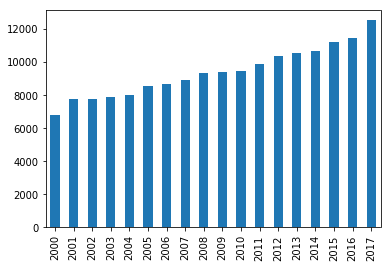

In [8]:
df_obitos.sum().plot.bar() # totais por ano

Text(0, 0.5, 'Número de óbidos por mês')

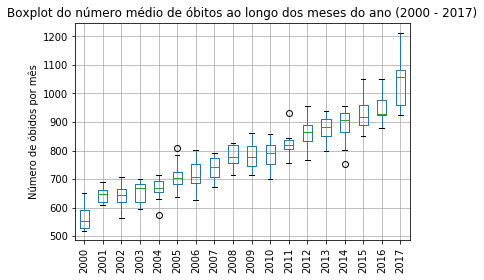

In [43]:
ax = df_obitos.boxplot(rot=90)
ax.set_title('Boxplot do número médio de óbitos ao longo dos meses do ano (2000 - 2017)')
ax.set_ylabel('Número de óbidos por mês')

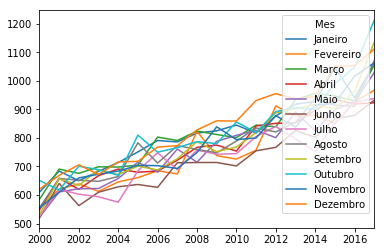

In [25]:
df_obitos.T.plot.line()

## Normalizar proporção (óbitos por mês divididos pela população brasileira no respectivo ano)

In [0]:
df_obitos_normalizado = df_obitos.copy()

In [57]:
df_obitos_normalizado = df_obitos_normalizado.T.apply(lambda x: x/df_populacao.loc[int(x.name)]['População'], axis=1)
df_obitos_normalizado = df_obitos_normalizado.multiply(100000) # por 100.000 habitates
df_obitos_normalizado

Mes,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
2000,0.351690,0.319403,0.337276,0.315944,0.300954,0.299801,0.302684,0.319980,0.306720,0.375328,0.319980,0.358032
2001,0.388890,0.352503,0.392870,0.374676,0.347386,0.364442,0.352503,0.374108,0.373539,0.351365,0.346817,0.380362
2002,0.364603,0.358433,0.379187,0.347775,0.348897,0.315802,0.338239,0.365725,0.355628,0.393210,0.370212,0.396015
2003,0.378144,0.339388,0.387002,0.369839,0.344925,0.337727,0.328869,0.358766,0.381466,0.381466,0.372607,0.372054
2004,0.390353,0.353176,0.381605,0.377778,0.359737,0.343882,0.314360,0.363564,0.367391,0.365751,0.373951,0.391446
2005,0.405615,0.357006,0.380771,0.367268,0.386172,0.344044,0.369969,0.422899,0.378610,0.437481,0.380231,0.387792
2006,0.422238,0.365655,0.428644,0.365121,0.362986,0.334694,0.399284,0.380068,0.367256,0.400352,0.375263,0.409960
2007,0.414857,0.355743,0.417496,0.381078,0.401662,0.376327,0.363660,0.407996,0.383717,0.404301,0.365771,0.407996
2008,0.426560,0.429692,0.430214,0.400454,0.373305,0.372783,0.395233,0.396800,0.410896,0.410896,0.391056,0.432303
2009,0.426260,0.381309,0.419543,0.400426,0.407143,0.368908,0.383892,0.386475,0.388542,0.403009,0.433493,0.444343


Text(0, 0.5, 'Número de óbidos por 100k habitantes')

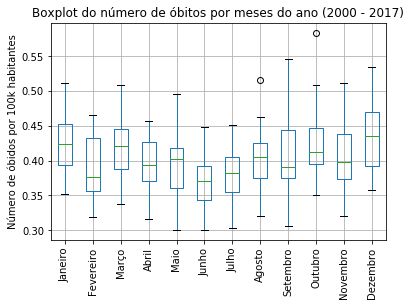

In [58]:
ax = df_obitos_normalizado.boxplot(rot=90)
ax.set_title('Boxplot do número de óbitos por meses do ano (2000 - 2017)')
ax.set_ylabel('Número de óbidos por 100k habitantes')

Text(0, 0.5, 'Número de óbidos por 100k habitantes')

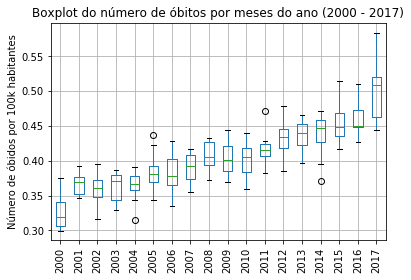

In [59]:
ax = df_obitos_normalizado.T.boxplot(rot=90)
ax.set_title('Boxplot do número de óbitos por meses do ano (2000 - 2017)')
ax.set_ylabel('Número de óbidos por 100k habitantes')

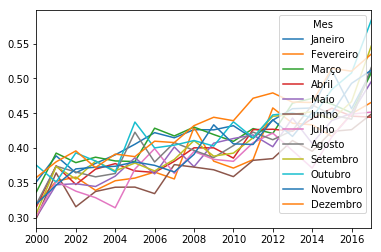

In [60]:
df_obitos_normalizado.plot.line()

# Salvar arquivos para testes estatísticos

In [61]:
df_obitos.T.to_csv('df_obitos.csv', sep=';')
df_obitos_normalizado.to_csv('df_obitos_normalizado.csv', sep=';')
df_obitos.sum(axis=1).to_csv('df_obitos_soma_por_mes.csv', sep=';')
df_obitos.sum(axis=0).to_csv('df_obitos_soma_por_ano.csv', sep=';')
df_populacao.to_csv('df_populacao.csv', sep=';')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.
